In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import tensorflow as tf
import models_tf as models

In [2]:
data = sio.loadmat("solution.mat")
c0 = data["IC"]
t = data["t"]
c_ref = data["y"]

t_train = t

# scale = np.array(
#     [10, 1, 10, 10, 0.0001, 1, 0.01, 10]
# ).reshape([1, -1])
scale = np.array(
    [10, 1, 10, 10, 0.0001, 1, 0.01, 10]
).reshape([-1])
# y_train = c_ref[:, 0:8] / scale
# y_train[:, 0:1] = y_train[:, 0:1] / 10
# y_train[:, 1:2] = y_train[:, 1:2] / 1
# y_train[:, 2:3] = y_train[:, 2:3] / 100
# y_train[:, 3:4] = y_train[:, 3:4] / 100
# y_train[:, 4:5] = y_train[:, 4:5] / 0.0001
y_train = c_ref / scale
# c0 = c0[:, 0:1]
# scale = np.array([10]).reshape([-1, 1])
model = models.NN(c0 / scale, scale, output_dim=8, units=100, activation=tf.tanh)

In [11]:
c_ref[:, 3] / 10

array([1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
       3.15475330e-12, 3.14694050e-12, 3.13919671e-12])

In [3]:
loss = model.train(t_train, y_train, niter=30000)

0 3370.8835
1000 6.0103607
2000 1.0364441
3000 0.27159345
4000 0.074044995
5000 0.026163425
6000 0.011025271
7000 0.0050760834
8000 0.0025688151
9000 0.0013928498
10000 0.0010396704
11000 0.00084733346
12000 0.00084473577
13000 0.00065731764
14000 0.0005442657
15000 0.00048337222
16000 0.00043372333
17000 0.00039099308
18000 0.00035700417
19000 0.0003231687
20000 0.00081384537
21000 0.00026267435
22000 0.04040421
23000 0.00020686841
24000 0.00020785248
25000 0.00020373092
26000 0.0040141838
27000 0.08790059
28000 0.012375589
29000 0.00014934942


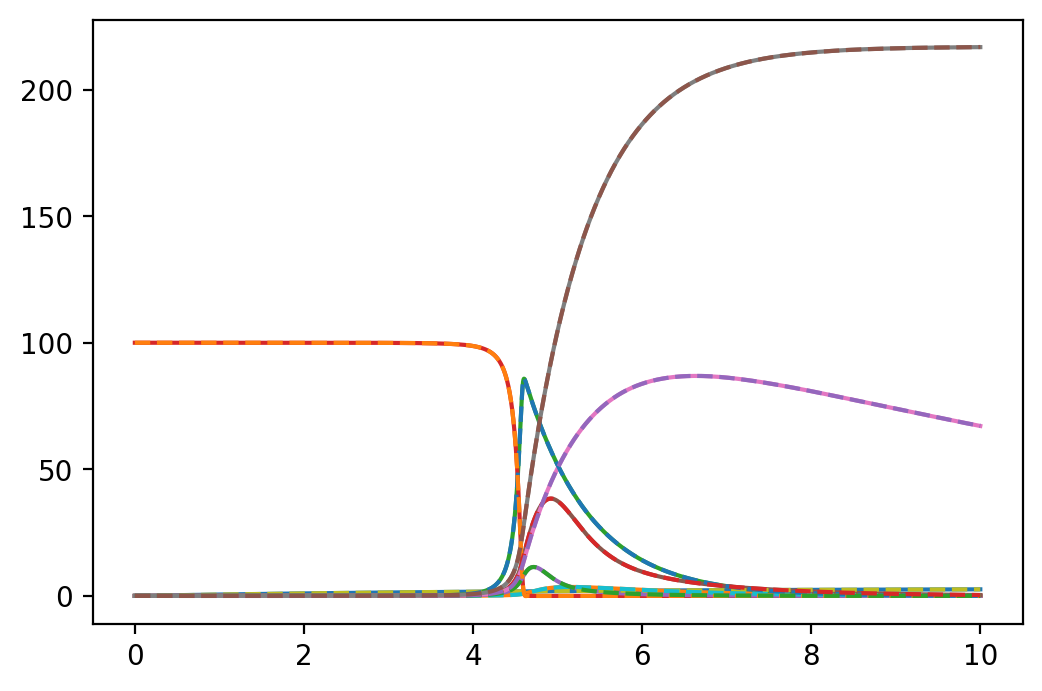

In [4]:
model.restore()
y_pred = model.call(
    tf.constant(t_train, tf.float32)
)

plt.figure(dpi=200)
plt.plot(t_train, y_train, "-", label="reference")
# plt.plot(t_train, y_train, '.', label="train")
plt.plot(t_train, y_pred, "--", label="prediction")
# plt.legend()
plt.show()

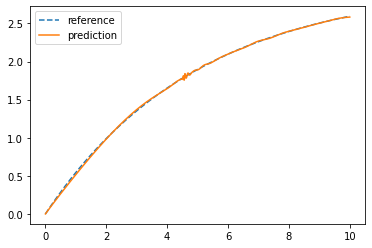

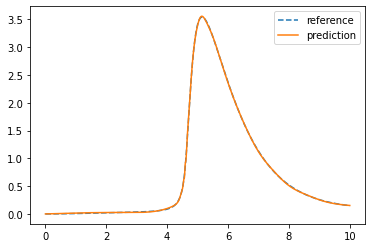

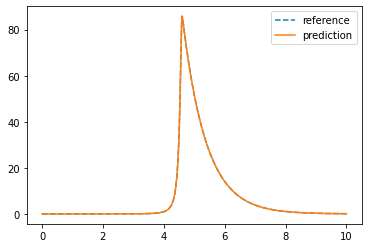

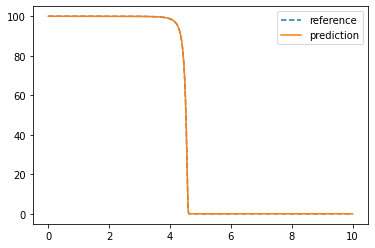

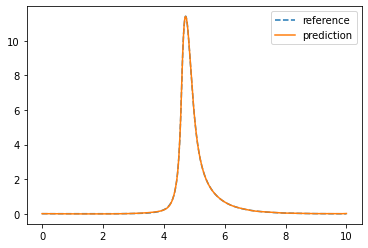

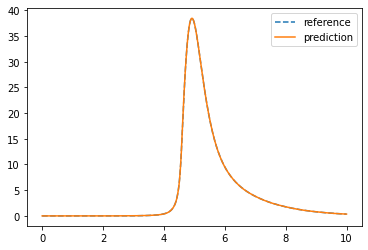

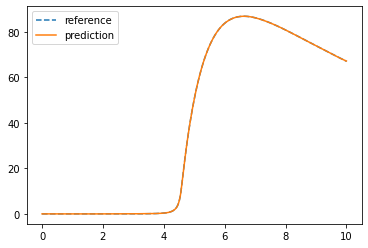

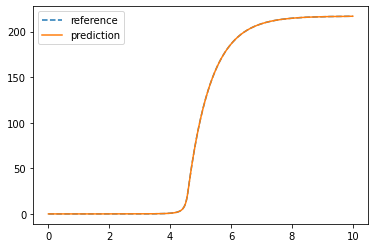

In [12]:
plt.plot(t_train, y_train[:, 0:1], '--', label="reference")
plt.plot(t_train, y_pred[:, 0:1], label="prediction")
plt.legend()
plt.show()

plt.plot(t_train, y_train[:, 1:2], '--', label="reference")
plt.plot(t_train, y_pred[:, 1:2], label="prediction")
plt.legend()
plt.show()

plt.plot(t_train, y_train[:, 2:3], '--', label="reference")
plt.plot(t_train, y_pred[:, 2:3], label="prediction")
plt.legend()
plt.show()

plt.plot(t_train, y_train[:, 3:4], '--', label="reference")
plt.plot(t_train, y_pred[:, 3:4], label="prediction")
plt.legend()
plt.show()

plt.plot(t_train, y_train[:, 4:5], '--', label="reference")
plt.plot(t_train, y_pred[:, 4:5], label="prediction")
plt.legend()
plt.show()

plt.plot(t_train, y_train[:, 5:6], '--', label="reference")
plt.plot(t_train, y_pred[:, 5:6], label="prediction")
plt.legend()
plt.show()

plt.plot(t_train, y_train[:, 6:7], '--', label="reference")
plt.plot(t_train, y_pred[:, 6:7], label="prediction")
plt.legend()
plt.show()

plt.plot(t_train, y_train[:, 7:8], '--', label="reference")
plt.plot(t_train, y_pred[:, 7:8], label="prediction")
plt.legend()
plt.show()

In [33]:
nn = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, activation=tf.nn.relu),
        tf.keras.layers.Dense(100, activation=tf.nn.relu),
        tf.keras.layers.Dense(1, activation=tf.math.exp),
    ]
)
nn.build(input_shape=[None, 1])
opt = tf.keras.optimizers.Adam()


def train_op(inputs, targets):
    with tf.GradientTape() as tape:
        loss = tf.reduce_mean((nn.call(inputs)-targets)**2)
    grads = tape.gradient(loss, nn.trainable_variables)
    opt.apply_gradients(zip(grads, nn.trainable_variables))
    return loss

In [34]:
t_train = tf.constant(t, tf.float32)
y_train = tf.constant(u_ref[:, 2:3] / 100, tf.float32)
train = tf.function(train_op)

In [35]:
loss = []
for i in range(20000):
    loss_value = train(t_train, y_train)
    loss += [loss_value.numpy()]
    if i%1000 == 0:
        print(i, loss_value.numpy())

0 11.798662
1000 0.047728024
2000 0.010311777
3000 0.002374878
4000 0.0034205853
5000 0.001537943
6000 0.00014031216
7000 0.0027043996
8000 0.010994103
9000 0.0013633058
10000 0.00081779517
11000 0.00010801232
12000 0.0005694721
13000 0.00024199647
14000 0.014014557
15000 0.00035612582
16000 0.007570042
17000 0.004912899
18000 0.00045944654
19000 0.00016528612


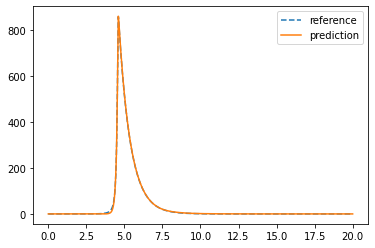